In [1]:
import seaborn as sns   
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = font_manager.findfont("Times New Roman")  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.style.use('bmh')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12
sns.set_palette("viridis",3)

In [2]:
import numpy as np

numdata = 50
S_tr = np.zeros(numdata)
S_rot = np.zeros(numdata)
S_vib = np.zeros(numdata)
S_tot = np.zeros(numdata)

In [3]:
for n in range(numdata):
    run = n+1
    data = np.loadtxt('run-{}/dodos/entropy.txt'.format(run))
    S_tr[n] = data[0]
    S_rot[n] = data[1]
    S_vib[n] = data[2]
    S_tot[n] = np.sum(data[0:2])

S_tot_avg = np.mean(S_tot)
S_tot_stderr = np.std(S_tot)

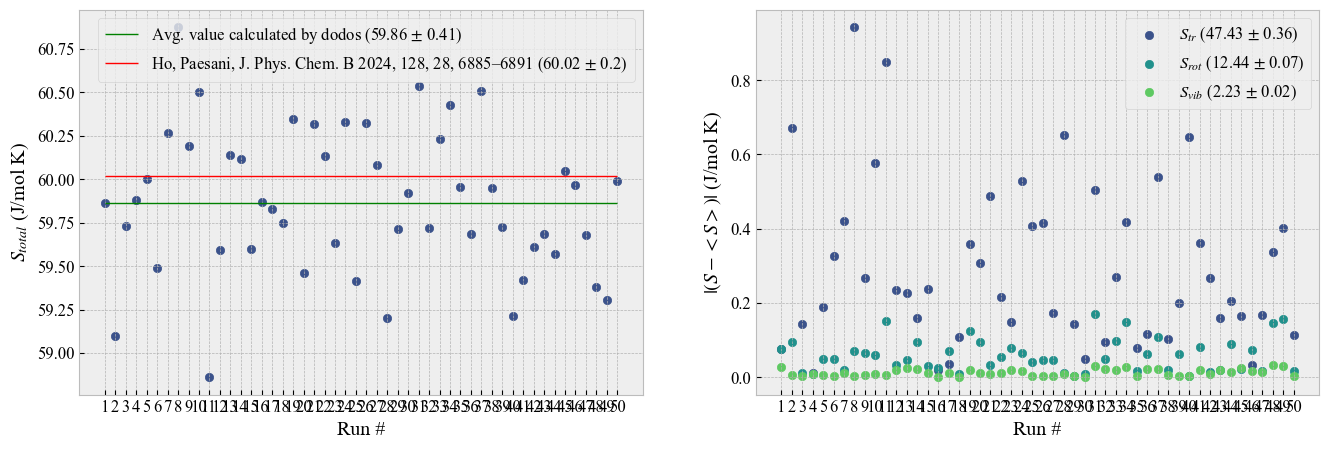

In [4]:
fig,axes = plt.subplots(1,2, figsize=(16,5))

x_axis = 1+np.arange(numdata)

# Upper plot
axis = axes[0]
axis.scatter(x_axis, S_tot, marker='o')
axis.hlines(y=np.mean(S_tot), xmin=1, xmax=numdata, lw=1.0, colors='green', label=r'Avg. value calculated by dodos ({:.2f} $\pm$ {:.2f})'.format(S_tot_avg,S_tot_stderr))
axis.hlines(y=60.02, xmin=1, xmax=numdata, lw=1.0, colors='red', label=r'Ho, Paesani, J. Phys. Chem. B 2024, 128, 28, 6885–6891 (60.02 $\pm$ 0.2)')
axis.legend()
axis.set(
    xlabel = 'Run #',
    ylabel = r'$S_{total}$ (J/mol K)',
)
axis.set_xticks(x_axis,x_axis)

# Lower plot
axis = axes[1]
axis.scatter(x_axis, np.abs(S_tr-np.mean(S_tr)  ), label=r'$S_{}$ ({:.2f} $\pm$ {:.2f})'.format('{tr}', np.mean(S_tr),np.std(S_tr)))
axis.scatter(x_axis, np.abs(S_rot-np.mean(S_rot)), label=r'$S_{}$ ({:.2f} $\pm$ {:.2f})'.format('{rot}',np.mean(S_rot),np.std(S_rot)))
axis.scatter(x_axis, np.abs(S_vib-np.mean(S_vib)), label=r'$S_{}$ ({:.2f} $\pm$ {:.2f})'.format('{vib}',np.mean(S_vib),np.std(S_vib)))
axis.legend()
axis.set(
    xlabel = 'Run #',
    ylabel = r'$\vert (S - <S>) \vert$ (J/mol K)',
)
axis.set_xticks(x_axis,x_axis)

plt.savefig('error-estimate.png', dpi=200, bbox_inches='tight')
plt.show()